# 矩阵向量内积

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# 设置专业风格
sns.set_theme(
    style="whitegrid",
    # palette="tab10",      # 10色区分清晰的调色板
    font_scale=1.1,       # 增大字体
    rc={"figure.figsize": (10, 6)}  # 设置默认画布大小
)


In [43]:


# 第一列数据（x轴，三组共用）
n = np.array([
    0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100,
    200, 300, 400, 500, 600, 700, 800, 900, 1000,
    2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000
])

# 第一组数据的y值
time1 = np.array([
    5.08781e-08, 2.82505e-07, 9.96741e-07, 2.17577e-06, 3.83331e-06,
    5.98857e-06, 8.5495e-06, 1.17321e-05, 1.52835e-05, 1.9323e-05,
    2.38896e-05, 9.53314e-05, 0.000215087, 0.000384988, 0.000601324,
    0.000866371, 0.00117222, 0.00151334, 0.00190739, 0.00235326,
    0.00940963, 0.0210968, 0.037812, 0.0587405, 0.0850843,
    0.116714, 0.153435, 0.194184, 0.238889
])

# 第二组数据的y值
time2 = np.array([
    5.09533e-08, 2.66096e-07, 9.18723e-07, 1.9948e-06, 3.51545e-06,
    5.48854e-06, 7.87443e-06, 1.06085e-05, 1.38611e-05, 1.75715e-05,
    2.174e-05, 8.868e-05, 0.000199937, 0.000357452, 0.000563161,
    0.00080993, 0.00110701, 0.0014445, 0.00182809, 0.00225459,
    0.00893587, 0.0200498, 0.0356405, 0.0555366, 0.0799108,
    0.108686, 0.14184, 0.179411, 0.221104
])

# 第三组数据的y值
time3 = np.array([
    5.13057e-08, 2.32306e-07, 8.98957e-07, 1.78833e-06, 3.3241e-06,
    4.92644e-06, 7.31623e-06, 9.64313e-06, 1.2854e-05, 1.59266e-05,
    2.00567e-05, 7.99572e-05, 0.00017979, 0.00031954, 0.0004999,
    0.000719518, 0.000980344, 0.00128218, 0.00162782, 0.00201689,
    0.00810585, 0.0185179, 0.032963, 0.0505505, 0.0721705,
    0.0981169, 0.127863, 0.162006, 0.198019
])

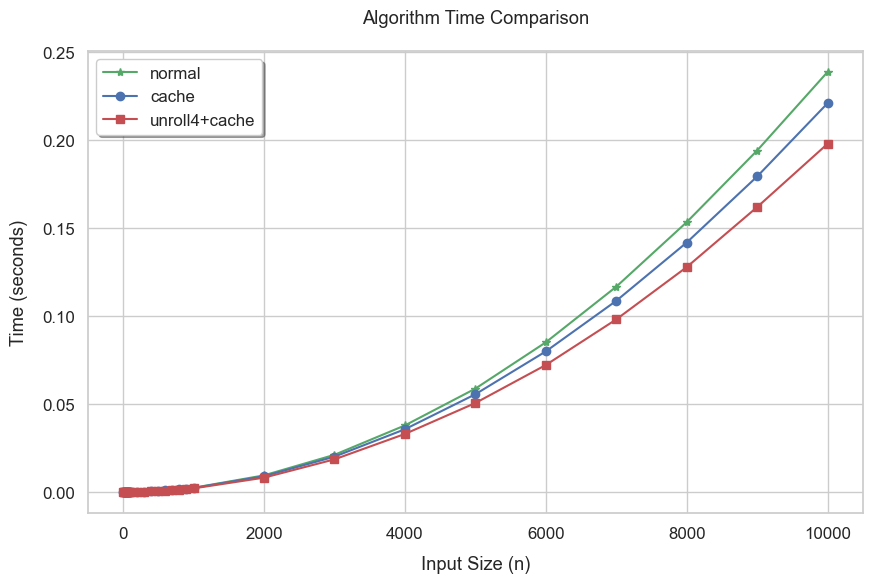

In [16]:
# 绘制对比曲线
plt.plot(n, time1, 'g-*', label='normal')

plt.plot(n, time2, 'b-o', label='cache')
plt.plot(n, time3, 'r-s', label='unroll4+cache')

plt.title('Algorithm Time Comparison', pad=20)
plt.xlabel('Input Size (n)', labelpad=10)
plt.ylabel('Time (seconds)', labelpad=10)
plt.legend(frameon=True, shadow=True)  # 带阴影的图例框

plt.savefig('output1_1.png', 
           dpi=300,          # 分辨率（300-600为出版级）
           bbox_inches='tight',  # 去除白边
           pad_inches=0.1,    # 保留少量边距
           facecolor='white') # 背景色

plt.show()

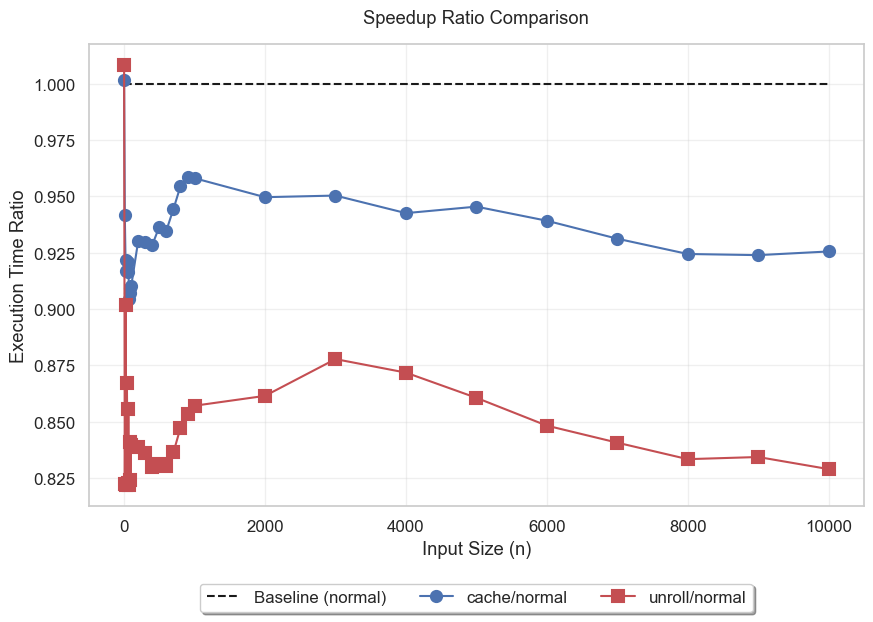

In [44]:
fig = plt.figure(figsize=(10,6))
plt.plot(n, np.ones_like(n), 'k--', label='Baseline (normal)')
plt.plot(n, time2/time1, 'b-o', label='cache/normal')
plt.plot(n, time3/time1, 'r-s', label='unroll/normal')

from matplotlib.ticker import MaxNLocator
plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=6, prune='both')) 
# nbins控制显示数量，prune去除边缘空白

plt.rcParams.update({
    'font.family': 'Arial',
    'axes.titlepad': 15,
    'lines.markersize': 8,
    'lines.markeredgewidth': 1.5
})

plt.title('Speedup Ratio Comparison')
plt.ylabel('Execution Time Ratio')
plt.xlabel('Input Size (n)')
# 将图例固定在图表下方，水平居中，与坐标轴无重叠
plt.legend(
    loc='upper center', 
    bbox_to_anchor=(0.5, -0.15),
    shadow=True,                # 添加阴影
    frameon=True,               # 显示边框
    ncol=3
)
plt.grid(True, alpha=0.3)
#plt.xticks(n)
plt.savefig('output1_2.png', 
           dpi=300,          # 分辨率（300-600为出版级）
           bbox_inches='tight',  # 去除白边
           pad_inches=0.1,    # 保留少量边距
           facecolor='white') # 背景色
plt.show()

# N个数求和

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# 设置专业风格
sns.set_theme(
    style="whitegrid",
    # palette="tab10",      # 10色区分清晰的调色板
    font_scale=1.1,       # 增大字体
    rc={"figure.figsize": (10, 6)}  # 设置默认画布大小
)

In [56]:
n = np.array([
    0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100,
    200, 300, 400, 500, 600, 700, 800, 900, 1000,
    2000, 3000, 4000, 5000
])

# 第一组数据
data1 = np.array([
    5.13383e-08, 6.34725e-08, 8.68542e-08, 1.09949e-07, 1.33201e-07,
    1.56359e-07, 1.79692e-07, 2.02981e-07, 2.26229e-07, 2.49397e-07,
    2.72760e-07, 5.05347e-07, 7.37782e-07, 9.70095e-07, 1.20838e-06,
    1.43812e-06, 1.67009e-06, 1.90233e-06, 2.13380e-06, 2.36654e-06,
    4.68098e-06, 6.99954e-06, 9.31308e-06, 1.16342e-05
])

# 第二组数据
data2 = np.array([
    5.36355e-08, 5.69488e-08, 7.06095e-08, 8.35113e-08, 9.53695e-08,
    1.08599e-07, 1.20557e-07, 1.33237e-07, 1.45450e-07, 1.58585e-07,
    1.70662e-07, 2.95862e-07, 4.20628e-07, 5.47390e-07, 6.73167e-07,
    7.92585e-07, 9.16592e-07, 1.04434e-06, 1.16477e-06, 1.29344e-06,
    2.52923e-06, 3.76979e-06, 5.00456e-06, 6.24082e-06
])

data3 = np.array([
    5.25704e-08, 5.60533e-08, 6.39741e-08, 7.00122e-08, 7.95615e-08,
    8.58817e-08, 9.58244e-08, 1.02506e-07, 1.11658e-07, 1.18452e-07,
    1.28056e-07, 2.08726e-07, 2.89926e-07, 3.70651e-07, 4.53166e-07,
    5.33350e-07, 6.15066e-07, 6.88712e-07, 7.69257e-07, 8.48717e-07,
    1.65157e-06, 2.45177e-06, 3.25296e-06, 4.00247e-06
])

# 第四组数据
data4 = np.array([
    5.12446e-08, 7.50667e-08, 1.00007e-07, 1.22735e-07, 1.50419e-07,
    1.75200e-07, 2.02573e-07, 2.31736e-07, 2.59839e-07, 2.86194e-07,
    3.14512e-07, 5.95644e-07, 8.87685e-07, 1.17676e-06, 1.45924e-06,
    1.72969e-06, 2.01007e-06, 2.30316e-06, 2.58441e-06, 2.87255e-06,
    5.73733e-06, 8.57983e-06, 1.14088e-05, 1.42102e-05
])

# 第五组数据
data5 = np.array([
    5.26679e-08, 7.38490e-08, 1.01042e-07, 1.19956e-07, 1.52452e-07,
    1.74946e-07, 1.98331e-07, 2.29871e-07, 2.58515e-07, 2.80383e-07,
    3.09643e-07, 5.83152e-07, 8.57103e-07, 1.13417e-06, 1.40208e-06,
    1.68631e-06, 1.95959e-06, 2.24438e-06, 2.51473e-06, 2.79151e-06,
    5.57813e-06, 8.37943e-06, 1.11821e-05, 1.39695e-05
])

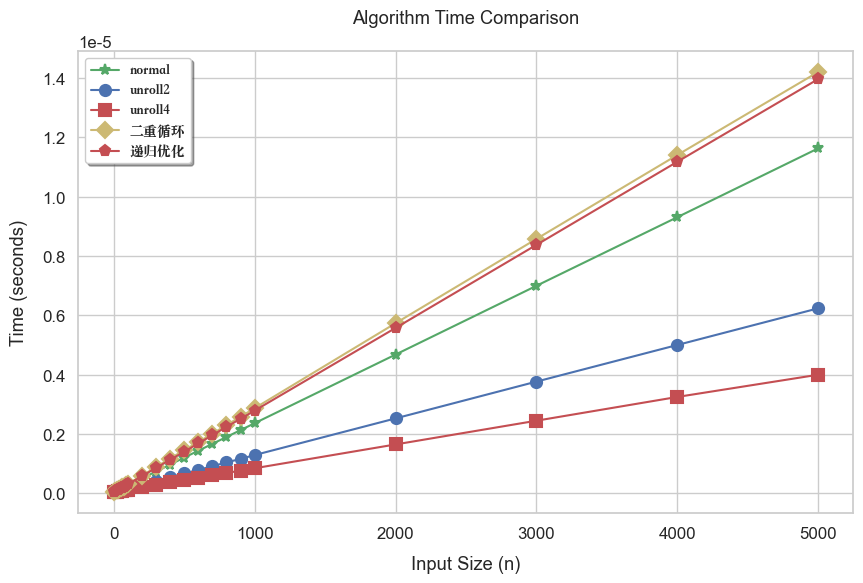

In [57]:
# 设置字体为 macOS 自带的中文字体
# plt.rcParams['font.sans-serif'] = [ 'Songti SC']  # 尝试多个备选
# plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题


# 绘制对比曲线
plt.plot(n, data1, 'g-*', label='normal')

plt.plot(n, data2, 'b-o', label='unroll2')
plt.plot(n, data3, 'r-s', label='unroll4')
plt.plot(n, data4, 'y-D', label='二重循环')
plt.plot(n, data5, 'r-p', label='递归优化')

plt.title('Algorithm Time Comparison', pad=20)
plt.xlabel('Input Size (n)', labelpad=10)
plt.ylabel('Time (seconds)', labelpad=10)
plt.legend(frameon=True, shadow=True,prop={'family': 'Songti SC', 'size': 10})  # 带阴影的图例框

plt.savefig('output2_1.png', 
           dpi=300,          # 分辨率（300-600为出版级）
           bbox_inches='tight',  # 去除白边
           pad_inches=0.1,    # 保留少量边距
           facecolor='white') # 背景色

plt.show()

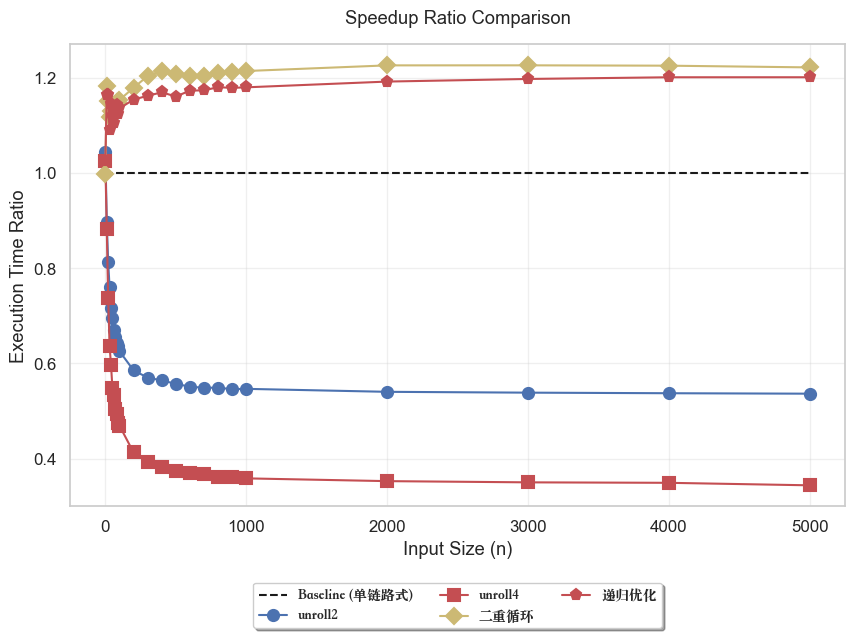

In [58]:


fig = plt.figure(figsize=(10,6))
plt.plot(n, np.ones_like(n), 'k--', label='Baseline (单链路式)')
plt.plot(n, data2/data1, 'b-o', label='unroll2')
plt.plot(n, data3/data1, 'r-s', label='unroll4')


plt.plot(n, data4/data1, 'y-D', label='二重循环')
plt.plot(n, data5/data1, 'r-p', label='递归优化')

from matplotlib.ticker import MaxNLocator
plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=6, prune='both')) 
# nbins控制显示数量，prune去除边缘空白

plt.rcParams.update({
    'font.family': 'Arial',
    'axes.titlepad': 15,
    'lines.markersize': 8,
    'lines.markeredgewidth': 1.5
})

plt.title('Speedup Ratio Comparison')
plt.ylabel('Execution Time Ratio')
plt.xlabel('Input Size (n)')
# 将图例固定在图表下方，水平居中，与坐标轴无重叠
plt.legend(
    loc='upper center', 
    bbox_to_anchor=(0.5, -0.15),
    shadow=True,                # 添加阴影
    frameon=True,               # 显示边框
    ncol=3,
    prop={'family': 'Songti SC', 'size': 10}  # 指定字体和大小
)
plt.grid(True, alpha=0.3)
#plt.xticks(n)
plt.savefig('output2_2.png', 
           dpi=300,          # 分辨率（300-600为出版级）
           bbox_inches='tight',  # 去除白边
           pad_inches=0.1,    # 保留少量边距
           facecolor='white') # 背景色
plt.show()